# Costal Systems Notebook 2c: Theory Equilibrium tide

In chapter 3 of the book and slides, we learned that the tide is generated through the interplay between gravitational attraction forces in the Earth-Moon and Earth-Sun systems respectively. In this notebook we will explore these concepts in a more interactive way, with some exercises, visualizations, and code. We will not repeat the whole theory, however, so make sure you have followed the lectures for this week and read the relevant pages in chapter 3 of the book.

We will explore the different aspects of the tide through this Jupyter notebook and use python to create figures, make computations, and analyse data. So, please make sure you activate the coastal environment before running the notebook. Then run the cell below, where we import the packages used in this notebook.

In [8]:
# Run this to import modules

import pathlib
import sys

from warnings import filterwarnings
import ipywidgets as widgets
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

cwd = pathlib.Path().resolve()
proj_dir = cwd.parent  # this is the root of the CoastalCodeBook

<br><br>

First we will have a look at the generation of the tide. To start, we are gonna look at the gravitational forces between the Earth, Moon, and Sun. As you have learned, the tide is generated by the so-called <b>differential pull</b>, meaning the difference in gravitational pull on water masses at different locations on the Earth. To make calculations, we first need a function that can compute the gravitational pull between two celestial bodies (e.g. the Earth and Moon).

In [3]:
### Functions
def grav_pull(m1, m2, d):
    """
    This function calculates the gravitational pull between two celestial bodies using Newton's law of universal gravitation.

    Parameters:
    m1 (float): mass of the first body in kg.
    m2 (float): mass of the second body in kg.
    d (float): distance between the two bodies in meters.

    Returns:
    g_pull (float): the gravitational pull between the two bodies in g

    """
    G = 6.67408e-11                 # universal gravitational constant
    g = 9.81                        # gravitational acceleration on the Earth
    g_pull = G * (m1 * m2) / d**2   # gravitational pull between two bodies
    
    # we divide the GP by g, so we get the gravitational pull in terms of g
    return g_pull / g 


The above function computes the gravitational pull between two celestial bodies. We can now use it to compute the forces between the Earth and the Sun or Moon. 
Find the required values and fill them in below and then run the function, which will show you the forces. For this notebook, we will compute the forces that are working on 1kg of Earth mass, to keep it simple. Hence, the mass we will fill in for the Earth will be 1kg. Also, we will express the forces in terms of the Earths own gravitational acceleration (g), which makes it easier to compare the magnitudes with each other. Run the code cell below to compute the gravitational pull of the moon and sun on the Earth. Compare the values to the ones in the book (section 3.7.2, pp.124-125). Are they equal? 

In [4]:
# Properties of Earth, Moon, and Sun
m_earth = 1         # mass of the earth in kg (we use 1 to compute the gravitational pull per kg of earth mass)
m_sun = 1.99e30     # mass of the sun in kg
m_moon = 7.35e22    # mass of the moon in kg
d_sun = 1.5e11      # distance between the centers of the sun and earth in meters
d_moon = 3.84e8     # distance between the centers of the moon and earth in meters
r = 6.37e6          # radius of the Earth in meters

# Now we compute the gravitational pull and print them
gp_sun = grav_pull(m_earth, m_sun, d_sun)
gp_moon = grav_pull(m_earth, m_moon, d_moon)

# Print out results
print("Gravitational pull from the Sun on the center of Earth:  %.2E g" % gp_sun)
print("Gravitational pull from the Moon on the center of Earth: %.2E g" % gp_moon)

Gravitational pull from the Sun on the center of Earth:  6.02E-04 g
Gravitational pull from the Moon on the center of Earth: 3.39E-06 g


<br><br>
As we can see, the gravitational pull of the sun is about two orders of magnitude larger than that of the moon, and both are much smaller than g. Yet, we know that these forces are somehow responsible for tidal ranges of multiple meters, and that the moon is actually responsible for about 70% of these tides. How come? As we can see in the formula, the gravitational pull is strongly dependent on the distance between the two celestial bodies. Moreover, since the Earth is a sphere, different locations on the Earth's surface will experience subtle differences in the gravitational pull, as the distance to the Sun/Moon varies slightly over the Earths surface. 

Let's use the above function to compute the gravitational pull from the sun at 8 different locations around the Earth's surface (A-H, see the figure below).

![earth_positions](./figures/02_earth_sun_gp.png)

In [5]:
# First we compute the distance between the center of the sun and each position on Earth
distance = d_sun  # switch to d_moon to change the computation to moon
distances = {
    "X": distance,
    "A": np.sqrt(r**2 + distance**2),  # Same as point E
    "B": np.sqrt(
        (r * np.sin(45 * np.pi / 180)) ** 2
        + (distance - r * np.cos(45 * np.pi / 180)) ** 2
    ),  # Same as point D
    "C": distance - r,
    "D": np.sqrt(
        (r * np.sin(45 * np.pi / 180)) ** 2
        + (distance - r * np.cos(45 * np.pi / 180)) ** 2
    ),  # Same as point B
    "E": np.sqrt(r**2 + distance**2),  # Same as point A
    "F": np.sqrt(
        (r * np.sin(45 * np.pi / 180)) ** 2
        + (r * np.cos(45 * np.pi / 180) + distance) ** 2
    ),  # Same as point H
    "G": distance + r,
    "H": np.sqrt(
        (r * np.sin(45 * np.pi / 180)) ** 2
        + (r * np.cos(45 * np.pi / 180) + distance) ** 2
    ),  # Same as point F
}

# Now compute the gravitational pull for each point.
gp = {}
for pos in distances:
    gp[pos] = grav_pull(m_earth, m_sun, distances[pos])
    print("Gravitational pull at position %s: %.5E g" % (pos, gp[pos]))

Gravitational pull at position X: 6.01718E-04 g
Gravitational pull at position A: 6.01718E-04 g
Gravitational pull at position B: 6.01754E-04 g
Gravitational pull at position C: 6.01769E-04 g
Gravitational pull at position D: 6.01754E-04 g
Gravitational pull at position E: 6.01718E-04 g
Gravitational pull at position F: 6.01682E-04 g
Gravitational pull at position G: 6.01667E-04 g
Gravitational pull at position H: 6.01682E-04 g


<br><br>
As we can see, the differences are very subtle (in the order of 10^-7 g). We also know that the gravitational pull is responsible for the Earth's rotation around the Sun. That would imply, however, that the rotation of the Earth varies over its body, along with the gravitational pull. Yet, we know that the Earth rotates around the Sun as a whole. Apparently, the Earth compensates for these subtle differences in gravitational pull so it can rotate around the Sun as one body. The water masses on the surface of the solid Earth, however, can move around and are not as fixed and rigid as the solid land masses. So, while the solid masses of the Earth remain virtually unchanged, its water masses are moved around by these subtle differences in gravitational pull.

So, let's visualize these differences. Earth's rotation is based on the gravitational pull that acts on its center, hence this will be our **reference pull**. For the other locations around the Earth, we will compute the difference to the reference pull, by subtracting the reference pull from the gravitational pull at each location. If we do this with the actual forces we computeed above we won't see the difference since they are very small. Therefore, we will visualize the forces out of proportion, i.e. we exaggerate the difference. Next to the difference in magnitude, there are also slight differences in the direction of the forces at different positions, as each force is directed towards the centre of the Sun/Moon. We will also visualize these out of proportion, so we can actually see the difference. Run the code cell below to get a visualization of the forces we talked about above.

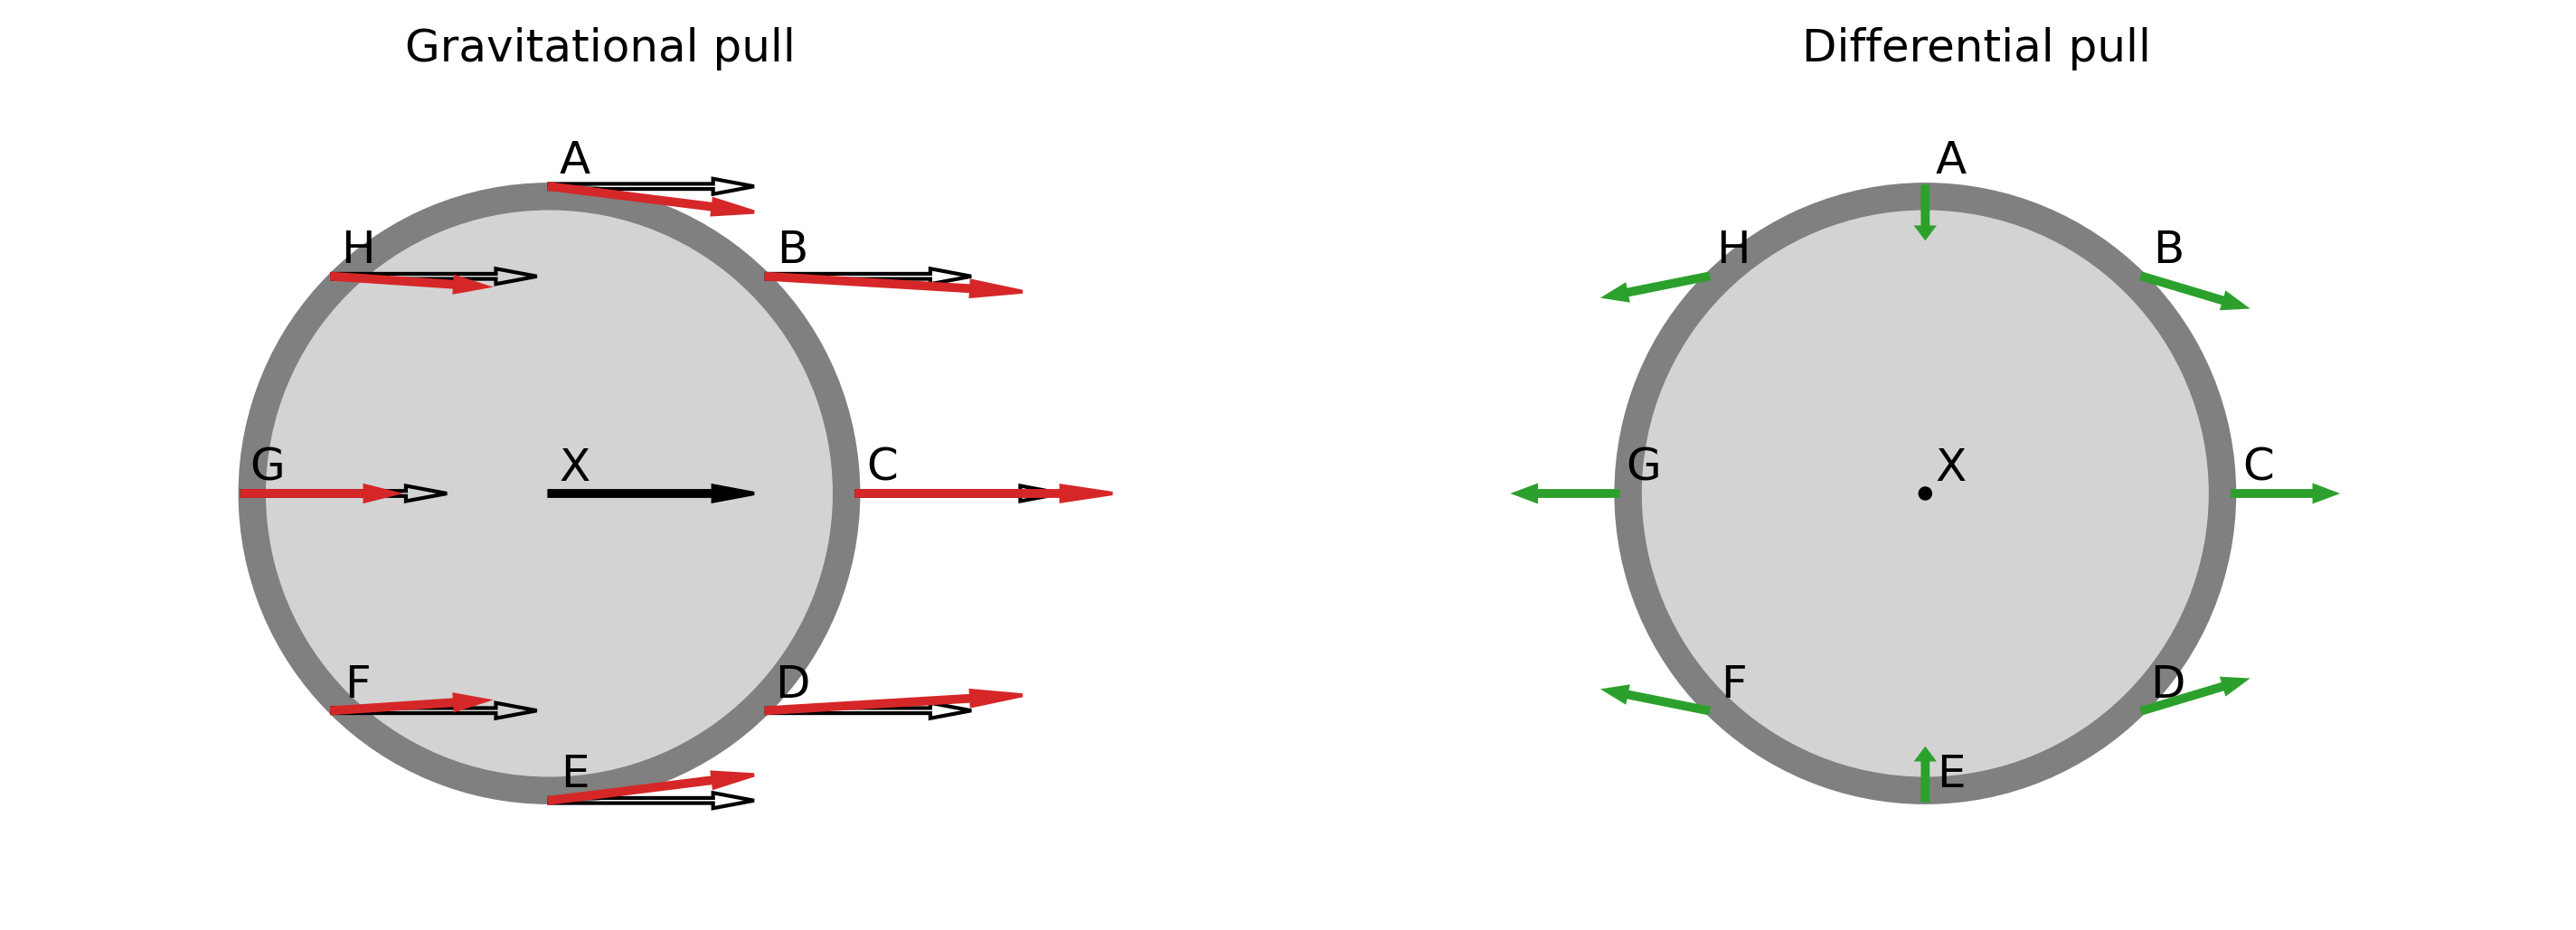

In [9]:
from Initialize.tide_initialize import plot_grav_pull

plot_grav_pull()

<br>
The red arrows indicate the gravitational pull at each individual location around Earth's surface. The black lined, transparent arrows represent the reference pull and are all equal to the black arrow at the center (X). If we subtract the black arrows from the red arrows at each location, we end up with the green arrows in the second plot, which we call the differential pull. Do the green arrows already give you an indication of the shape of the tides?

Now, let's compute the actual differential pull at location C, for both the Earth-Sun and the Earth-Moon system. You can also check this calculation written out on page 124 of the book.

In [13]:
dp_C_moon = grav_pull(m_earth, m_moon, d_moon - r) - grav_pull(m_earth, m_moon, d_moon)
dp_C_sun = grav_pull(m_earth, m_sun, distances["C"]) - grav_pull(m_earth, m_sun, d_sun)

print("Differential pull at C due to the moon: %E g" % dp_C_moon)
print("Differential pull at C due to the sun : %E g" % dp_C_sun)
print("Percentage of the total differential pull associated to the moon: %.1f%%"
    % (dp_C_moon / (dp_C_sun + dp_C_moon) * 100))
print("Percentage of the total differential pull associated to the sun : %.1f%%"
    % (dp_C_sun / (dp_C_sun + dp_C_moon) * 100))

Differential pull at C due to the moon: 1.153713E-07 g
Differential pull at C due to the sun : 5.110917E-08 g
Percentage of the total differential pull associated to the moon: 69.3%
Percentage of the total differential pull associated to the sun : 30.7%


<br><br>
Now we can see that the differential pull is actually larger for the Moon than for the Sun. Can you explain why this is the case (hint: look at the formula to compute the gravitational pull).

Still, both are several orders of magnitude smaller than the Earth's own attraction towards its centre, g. That means, that the component of the differential pull that is in line with Earth's center can be neglected, since its magnitude is negligible compared to g, and will therefore not make a noticable difference. The only thing we are left with then, are the *tangential components* of the differential pull. These are the forces that generate the tide by moving the water around the surface of the Earth. This results in the two bulges of water at either side of the Earth, in line with the Sun/Moon. Hence, if the Sun and Moon are aligned (full moon and new moon), the forces enhance each other and we get a spring tide (larger tidal range). On the other hand, if they are perpendicular to each other (1st and 3rd quarter moon), the lunar and solar differential pull work against each other and we get a neap tide. In the figure below you can play around with different constellations of the Moon and Sun, to see what the effect is on the total tidal shape.

The code below visualizes this concept. In the plot, the sun is fixed to the right side of the Earth (see also Figure 3.21 in the book). You can adjust the position of the Moon by setting its angle relative to the position of the sun. So if you set it at 90, the moon will be in a position 90 degrees counterclock-wise from the sun (i.e. they will be perpendicular). In short, this means:

|Angle | Position |
|:-:|-|
| 0   | New moon | 
| 90  | 1st quarter moon | 
| 180 | Full moon |
| 270 | 3rd quarter moon |

Note: the figure only plots the correct total tide for intervals of 90 degrees (0, 90, 180, or 270 degrees)

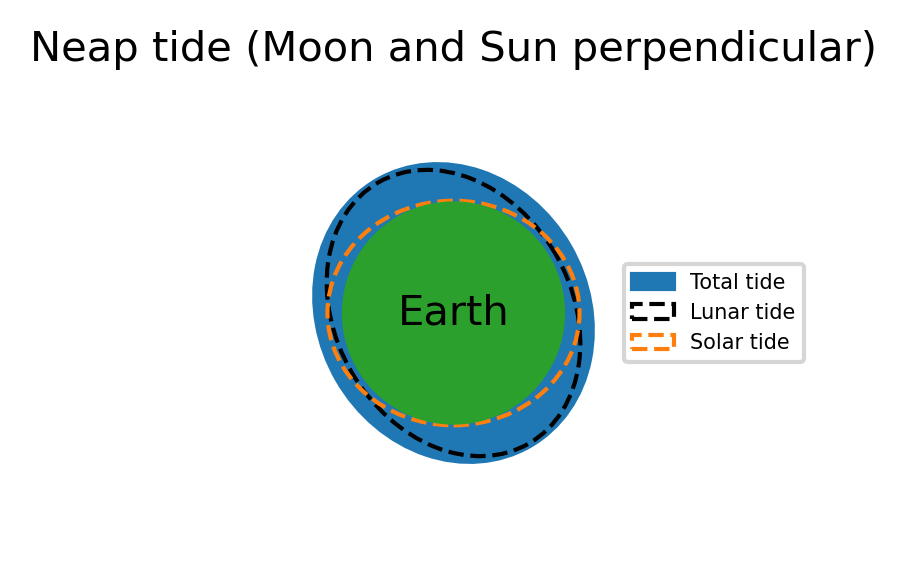

In [1]:
# Note: the figure only plots the correct total tide for intervals of 90 degrees (0, 90, 180, or 270 degrees)

angle_moon = 120 # Adjust here the position of the moon
angle_sun = 0 # Fixed at 0, dont change

from Initialize.tide_initialize import plot_tide_diagram

plot_tide_diagram(angle_sun, angle_moon)